In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv",header=None)

In [3]:
df.shape

(699, 11)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [10]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [11]:
df.dtypes


Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [14]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [15]:
df['Bare_Nuclei'].isna().sum()

16

##### We can see that there are 16 nan values in the dataset. I will impute missing values after dividing the dataset into training and test set.

In [16]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [18]:
df['Class'].value_counts()/np.float64(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [19]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

kNN algorithm is robust to outliers.

### Data Visualization 

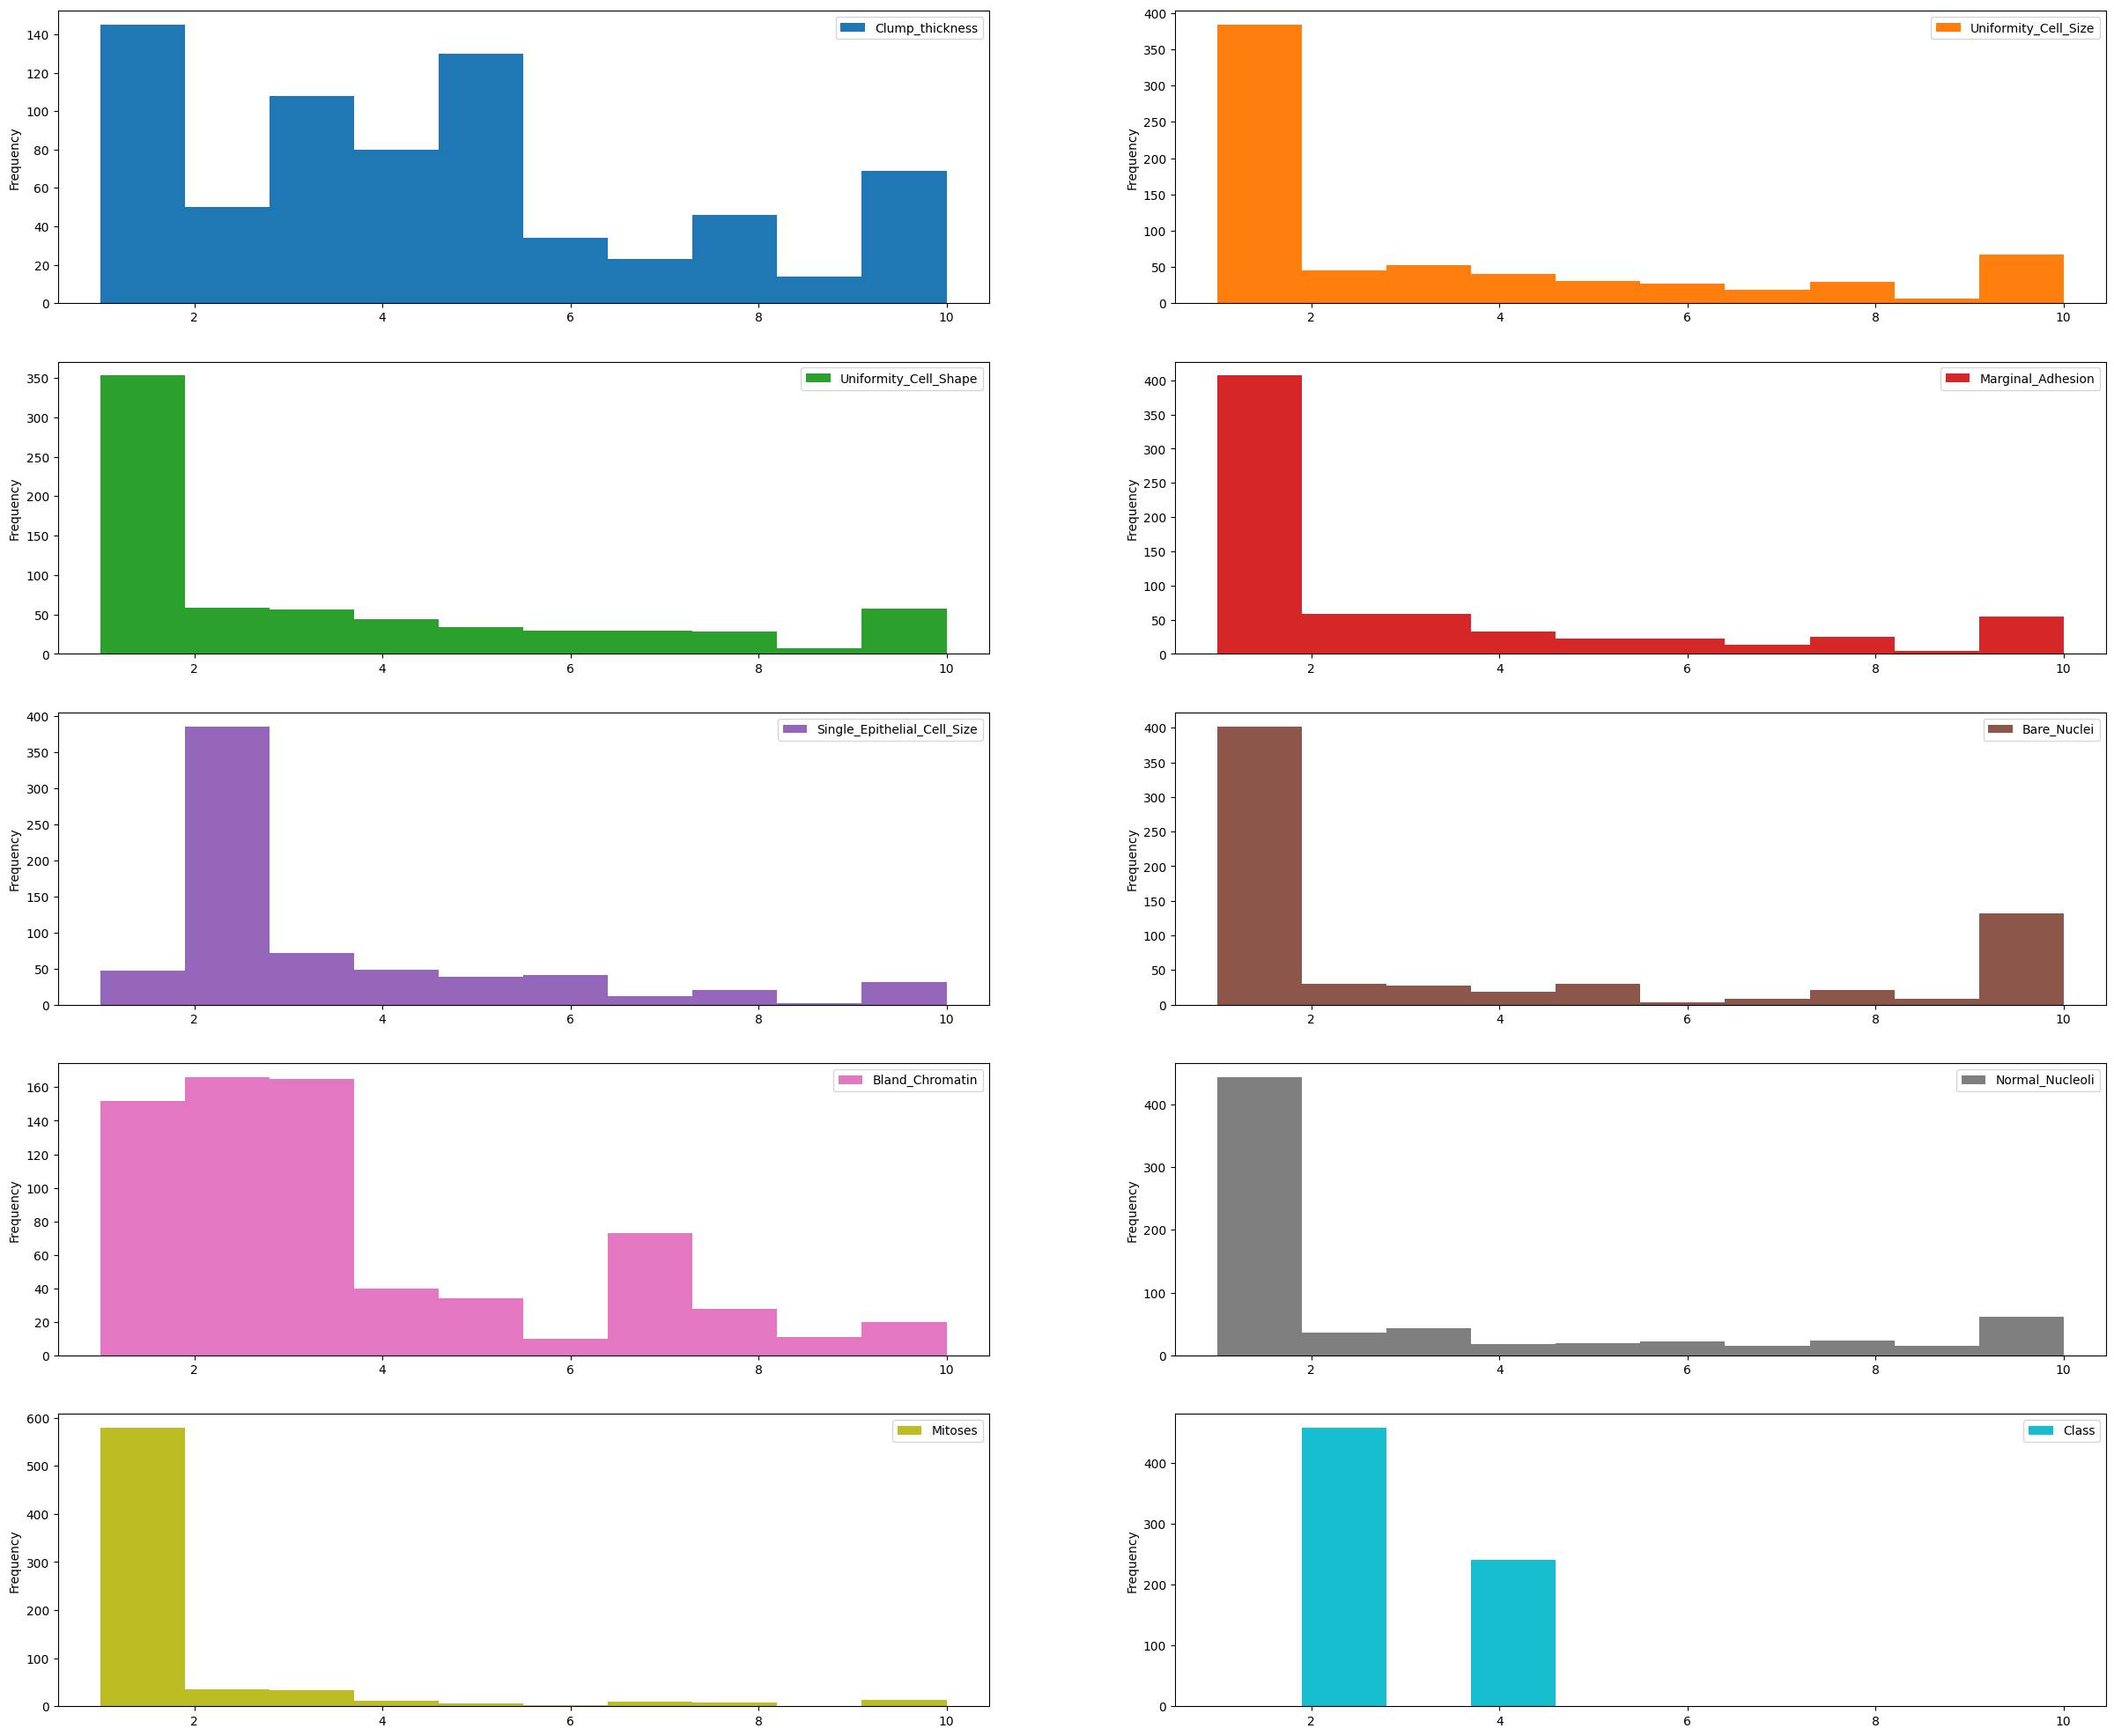

In [20]:
# plot histograms of the variables

plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

Multivariate plots

In [21]:
correlation = df.corr()

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

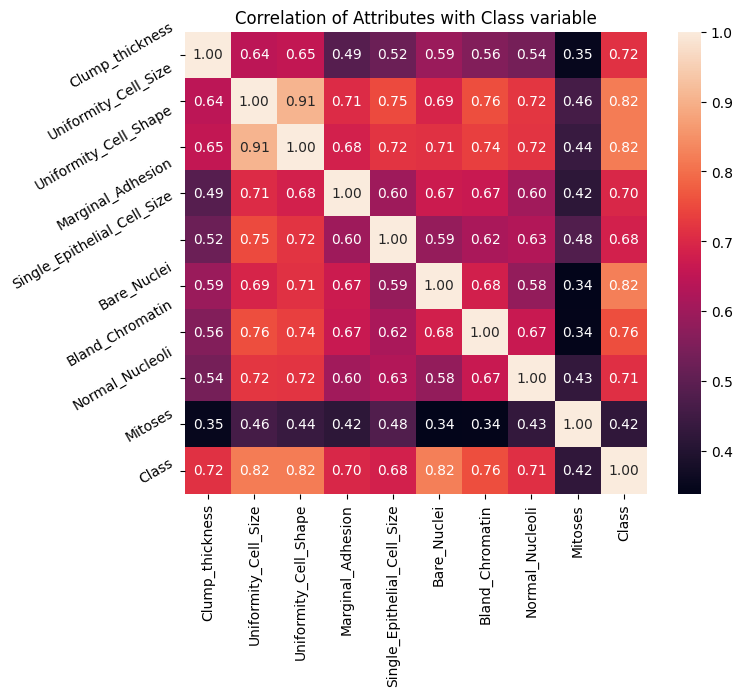

In [25]:
plt.figure(figsize=(8,6))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [26]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

### Feature Engineering

In [29]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [30]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [31]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

assume that the data are missing completely at random (MCAR).

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [33]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


### Feature Scaling

In [35]:
cols = X_train.columns

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [38]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [39]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


### Fit K Neighbours Classifier

In [40]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [42]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


In [45]:
y_pred_train = knn.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


In [47]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [46]:
null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


<Axes: >

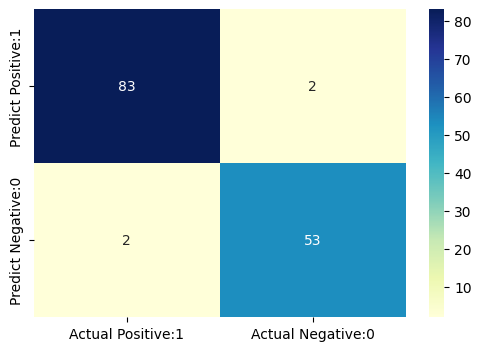

In [50]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

